In [1]:
import os
os.sys.path.append("../")
from scripts.visualisation import *

In [2]:
spark = (
    SparkSession.builder.appName("Preliminary Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True)
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "2g")
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
24/09/17 04:55:17 WARN Utils: Your hostname, DESKTOP-H0CEB6G resolves to a loopback address: 127.0.1.1; using 172.29.253.151 instead (on interface eth0)
24/09/17 04:55:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/17 04:55:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/09/17 04:55:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
path = "../data/curated"

In [4]:
merchant_profitability = spark.read.parquet(f"{path}/merchant_profitability.parquet")


# Visualisation 

In this notebook plot graphs to get understanding of distributions of revenue levels 

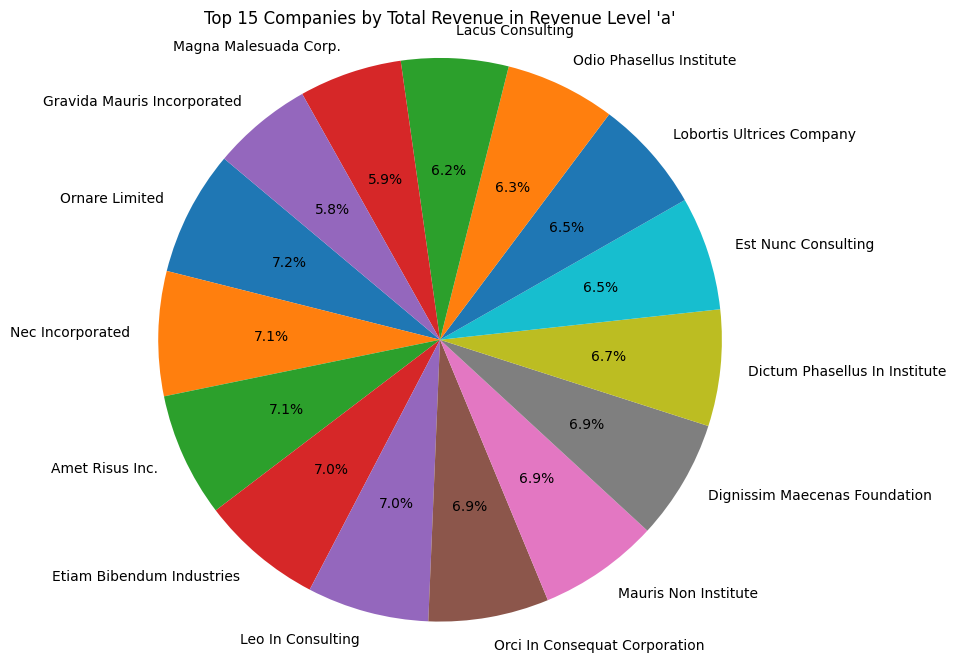

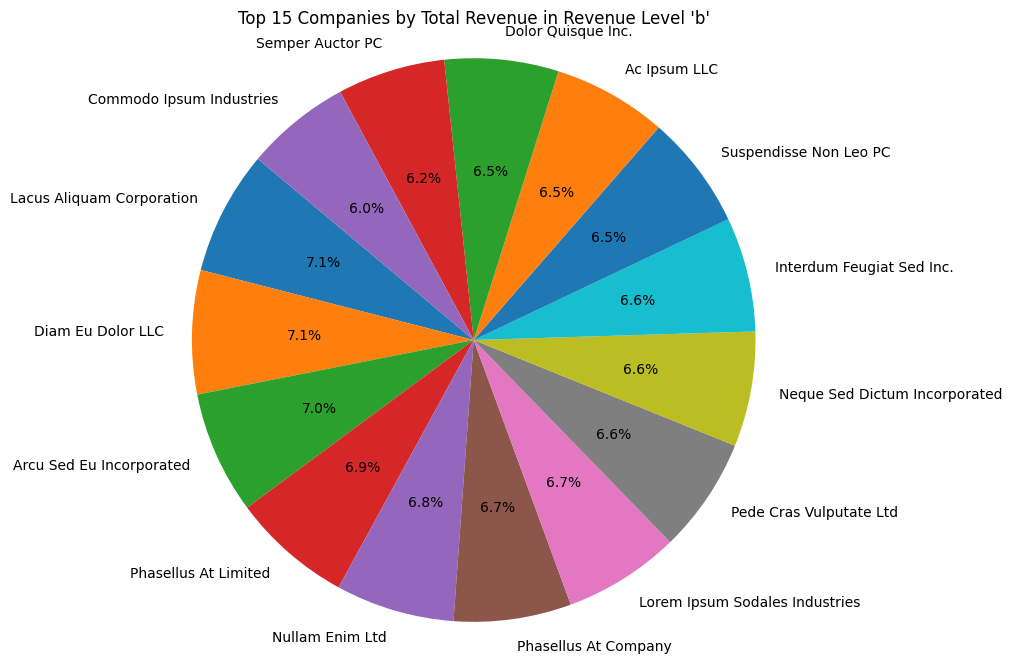

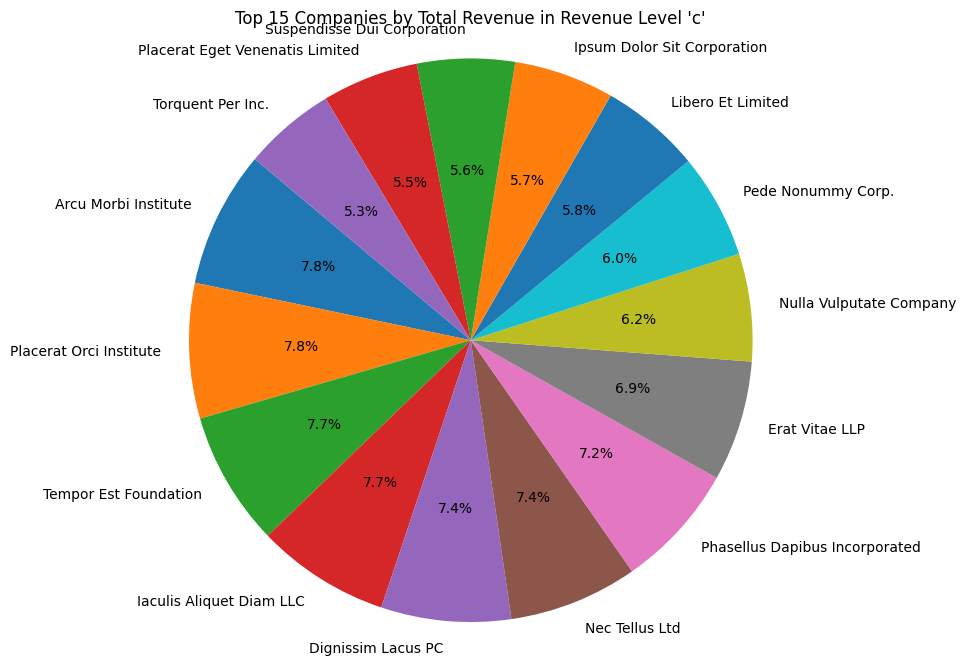

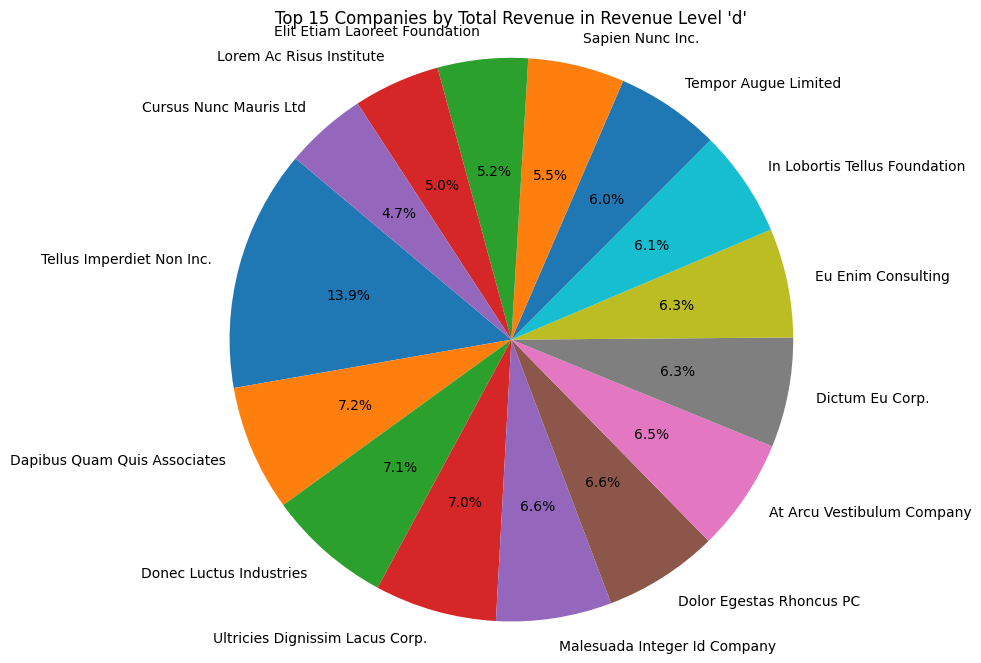

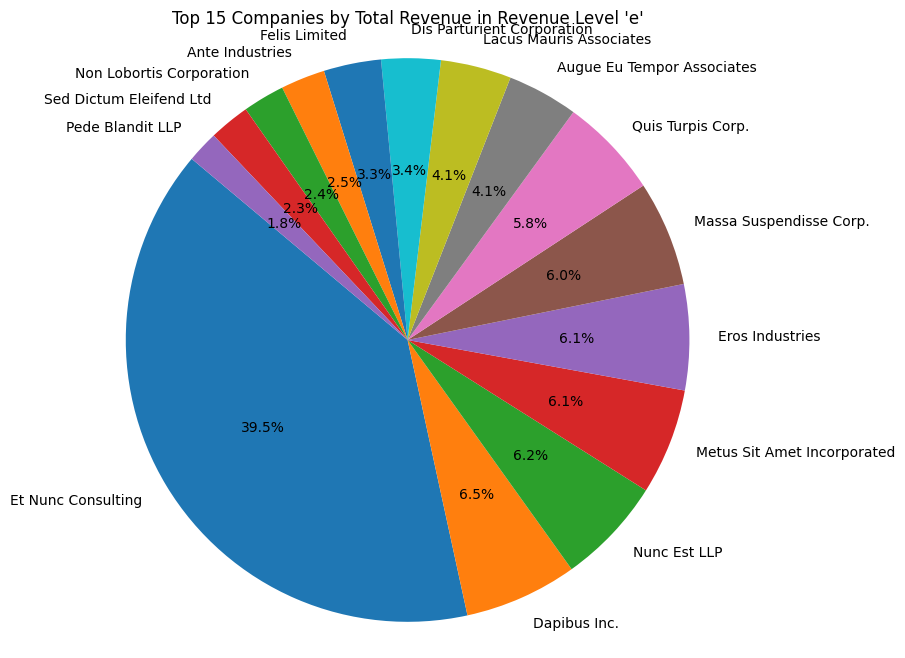

In [5]:

# Define revenue levels
revenue_levels = ['a', 'b', 'c', 'd', 'e']

# Loop through each revenue level
for level in revenue_levels:
    # Filter for the current revenue level
    revenue_level_df = merchant_profitability.filter(F.col("revenue_level") == level)
    
    # Group by company name and calculate the total revenue
    merchant_revenue = revenue_level_df.groupBy("name").agg(F.sum("total_revenue").alias("total_revenue"))
    
    # Sort by total revenue and select the top N companies (e.g., top 15)
    top_n_merchants = merchant_revenue.orderBy(F.desc("total_revenue")).limit(15).toPandas()
    
    # Call the function to plot the pie chart
    plot_top_merchants_pie(top_n_merchants, level)


/tmp/ipykernel_1579/2018813828.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="revenue_level", y="net_revenue", data=merchant_profitability_pd,


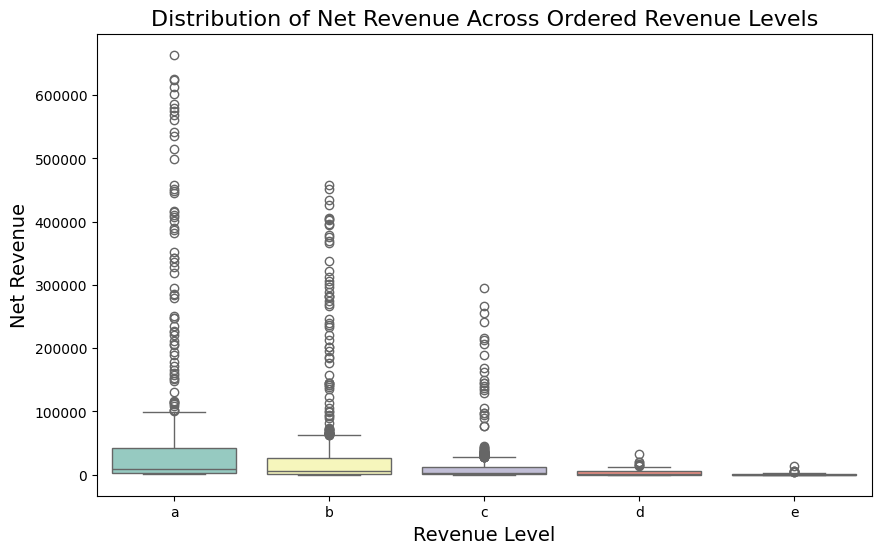

In [6]:

# Convert the Spark DataFrame to Pandas for visualization
merchant_profitability_pd = merchant_profitability.select("revenue_level", "net_revenue").toPandas()

# Ensure that the revenue levels are ordered from 'a' to 'e'
ordered_levels = ['a', 'b', 'c', 'd', 'e']
merchant_profitability_pd['revenue_level'] = pd.Categorical(merchant_profitability_pd['revenue_level'], 
                                                           categories=ordered_levels, 
                                                           ordered=True)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the box plot using seaborn with the specified order
sns.boxplot(x="revenue_level", y="net_revenue", data=merchant_profitability_pd, 
            palette="Set3", order=ordered_levels)

# Set the plot's title and labels
plt.title("Distribution of Net Revenue Across Ordered Revenue Levels", fontsize=16)
plt.xlabel("Revenue Level", fontsize=14)
plt.ylabel("Net Revenue", fontsize=14)

# Show the plot
plt.show()

In [8]:
merchant_profitability.show()

+------------+------------------+-------------------+------------+-------------------------+--------------------+--------------------+-------------+---------+------------------+
|merchant_abn|     total_revenue|average_order_value|total_orders|average_fraud_probability|                name|            category|revenue_level|take_rate|       net_revenue|
+------------+------------------+-------------------+------------+-------------------------+--------------------+--------------------+-------------+---------+------------------+
| 51321276923| 498594.8221654192| 149.14592347155823|        3343|                     NULL| Aenean Eget Limited|antique shops - s...|            b|     3.96|  19744.3549577506|
| 27500085887| 991894.6986807215|  151.4574284136084|        6549|                     NULL|Vitae Posuere Ind...|watch, clock, and...|            b|     4.85| 48106.89288601499|
| 65426342453|1001077.6780881734|  373.8154137745233|        2678|                     NULL|   Nisl Nulla Eu L

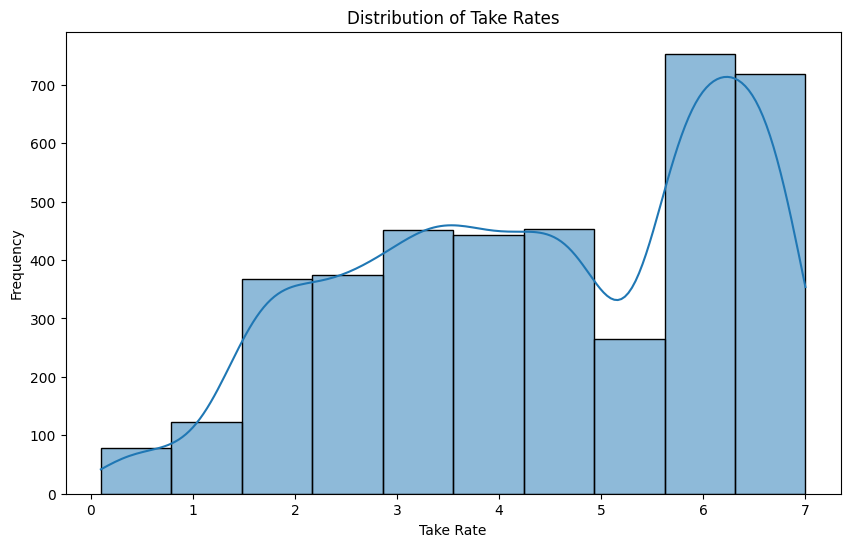

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
# Assuming 'merchant_profitability' is your PySpark DataFrame
merchant_profitability_pandas = merchant_profitability.select('take_rate').toPandas()

# Plotting the take rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(merchant_profitability_pandas['take_rate'], bins=10, kde=True)
plt.title('Distribution of Take Rates')
plt.xlabel('Take Rate')
plt.ylabel('Frequency')
plt.show()

